#KERAS PROJECT -> 2

#HOUSE PRICE PREDICTION PROJECT

#DATA DESCRIPTION

We are going to predict price of house.
1. id - Unique ID for each home sold
2. date - Date of the home sale
3. price - Price of each home sold
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. sqft_living - Square footage of the apartments interior living space
7. sqft_lot - Square footage of the land space
8. floors - Number of floors
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
10. view - An index from 0 to 4 of how good the view of the property was
11. condition - An index from 1 to 5 on the condition of the apartment,
12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11 have a high quality level of construction and design.
13. sqft_above - The square footage of the interior housing space that is above ground level
14. sqft_basement - The square footage of the interior housing space that is below ground level
15. yr_built - The year the house was initially built
16. yr_renovated - The year of the house’s last renovation
17. zipcode - What zipcode area the house is in
18. lat - Lattitude
19. long - Longitude
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#IMPORTS

In [6]:
#Import Numpy And Pandas
import numpy as np
import pandas as pd

In [8]:
#Import Matplotlib And Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#THE DATA

In [10]:
# Read data
df = pd.read_csv('kc_house_data.csv')

In [12]:
#Head of df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
#Describe on df
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
#Info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#EXPLORATORY  DATA ANALYSIS

<Axes: >

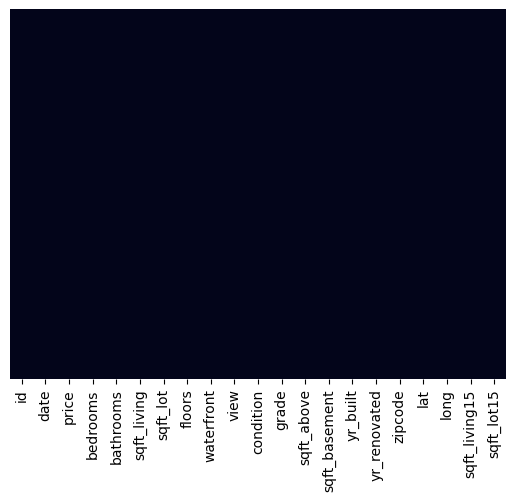

In [22]:
#Checking for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [24]:
#No null values

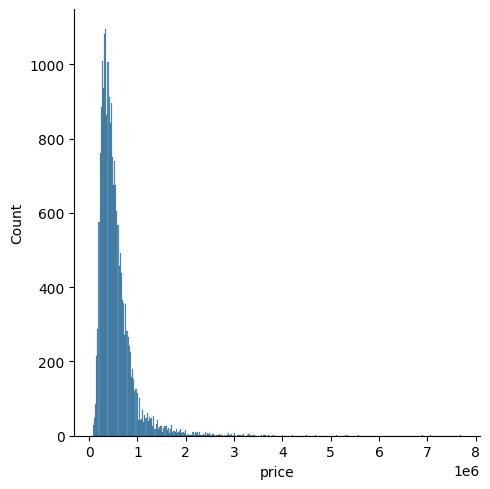

In [26]:
#Displot on price
sns.displot(df['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

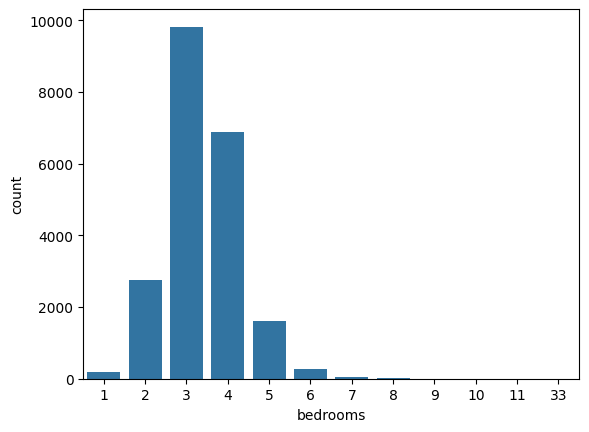

In [28]:
#Countplot on no. of bedrooms
sns.countplot(data=df,x='bedrooms')

In [34]:
#Corr of price with other features on df
df.drop(['id','date'],axis=1).corr()['price']

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

Connclusion -> It seems that sqft_living has highest correlation with our price

<Axes: xlabel='sqft_living', ylabel='price'>

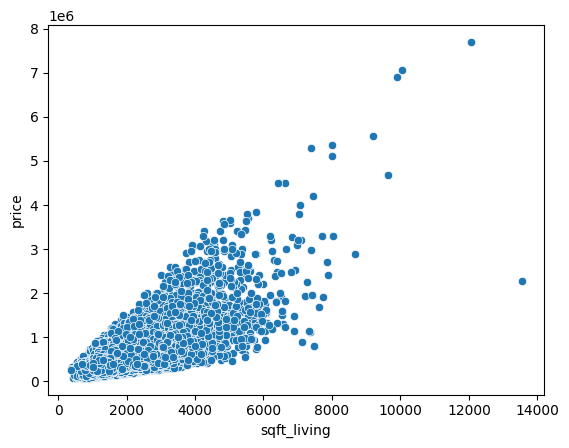

In [37]:
#Scatter plot of price vs sqft_living
sns.scatterplot(data=df,x='sqft_living',y='price')

<Axes: xlabel='bedrooms', ylabel='price'>

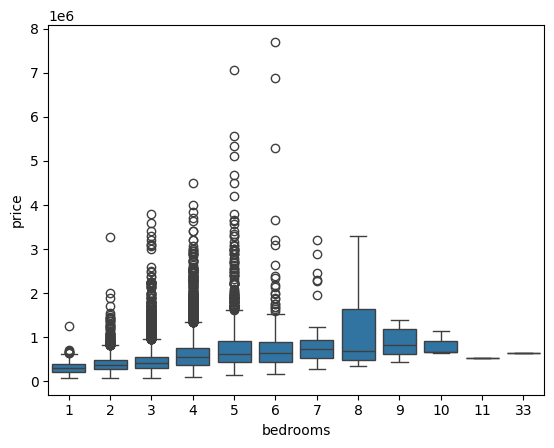

In [42]:
#Boxplot of no. of 
sns.boxplot(data=df,x='bedrooms',y='price')

#GEOGRAPHICAL PROPERTIES

<Axes: xlabel='price', ylabel='lat'>

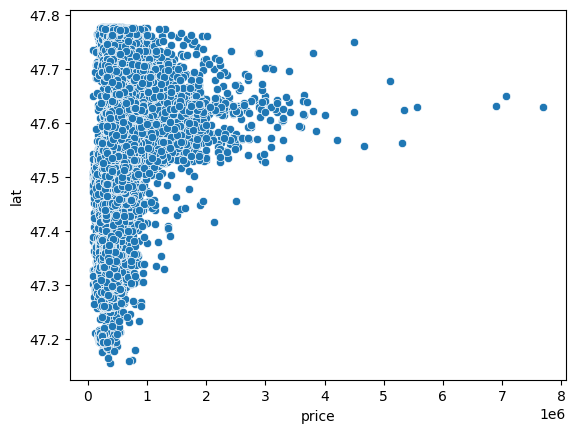

In [45]:
#Scatterplot of lat vs price
sns.scatterplot(data=df,y='lat',x='price')

<Axes: xlabel='price', ylabel='long'>

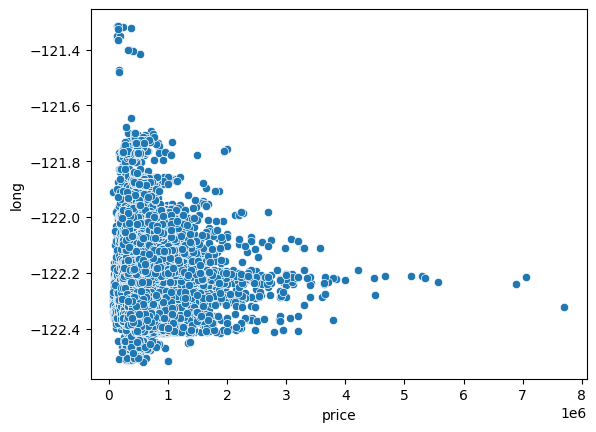

In [47]:
#Scatterplot of longl vs price
sns.scatterplot(data=df,y='long',x='price')

<Axes: xlabel='long', ylabel='lat'>

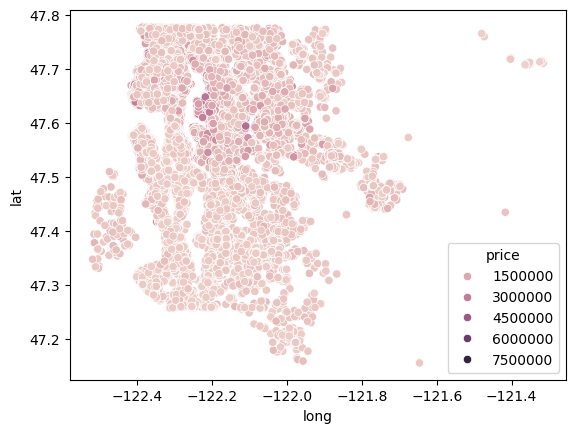

In [53]:
sns.scatterplot(data=df,x='long',y='lat',hue='price')

Conclusion -> -122.2 longitude and 47.6 latitude is a costly area.

<Axes: xlabel='waterfront', ylabel='price'>

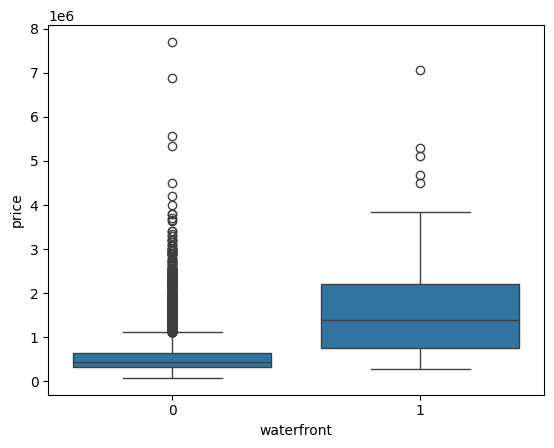

In [60]:
#Box plot of waterfront
sns.boxplot(data=df,x='waterfront',y='price')

#WORKING WITH FEATURE DATA

In [63]:
#Drop id and check new head
df.drop('id',axis=1,inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#FEATURE ENGINEERING FROM DATE

In [70]:
#Covert date column from str to DateTime
#Check new head
df['date']=df['date'].apply(pd.to_datetime)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [78]:
#Extract Month and year columns
#Check new head
def monthh(n):
    return n.month
def yearr(n):
    return n.year
df['Month']=df['date'].apply(monthh)
df['Year']=df['date'].apply(yearr)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<Axes: xlabel='Year', ylabel='price'>

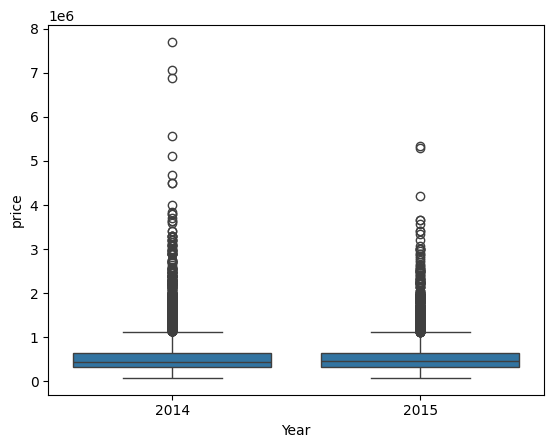

In [84]:
#Boxplot of price vs year
sns.boxplot(data=df,x='Year',y='price')

<Axes: xlabel='Month', ylabel='price'>

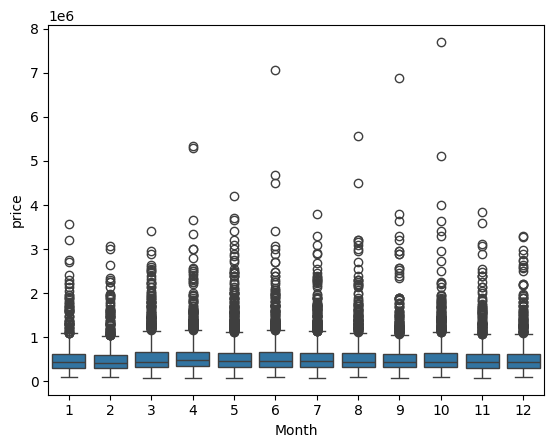

In [86]:
#Boxplot of price vs month
sns.boxplot(data=df,x='Month',y='price')

<Axes: xlabel='Year', ylabel='count'>

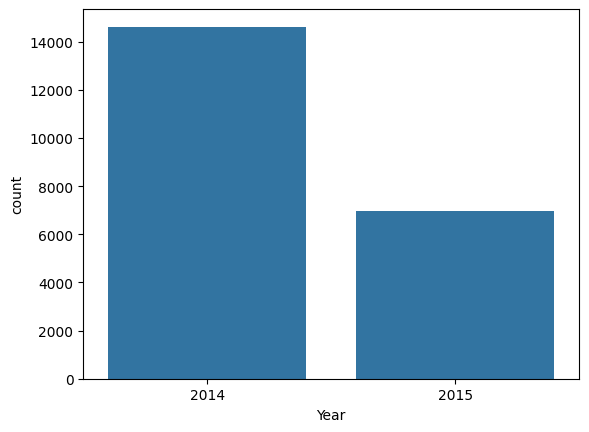

In [88]:
#Countplot of year
sns.countplot(data=df,x='Year')

In [94]:
#Mean price for all months
prices = []
for i in range(1,13):
    prices.append(df[df['Month']==i]['price'].mean())
new_df = pd.DataFrame()
new_df['MONTH']=range(1,13)
new_df['PRICE OF MONTH']=prices
new_df

,MONTH,PRICE OF MONTH
0,1,525963.251534
1,2,508520.051323
2,3,544057.683200
3,4,562215.615074
4,5,550849.746893
5,6,557534.318182
6,7,544892.161013
7,8,536655.212481
8,9,529723.517787
9,10,539439.447228


<Axes: xlabel='MONTH', ylabel='PRICE OF MONTH'>

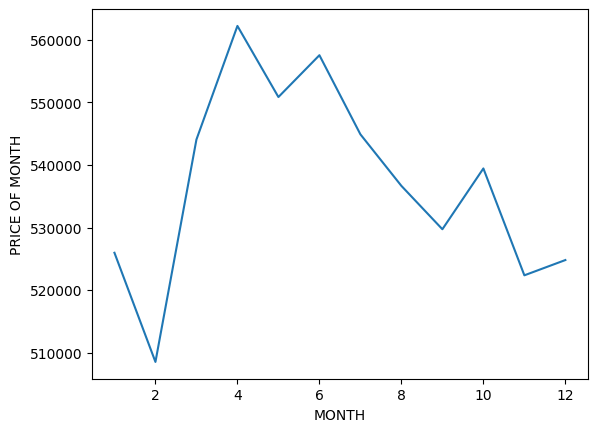

In [98]:
#Lineplot of price vs month
sns.lineplot(data=new_df,x='MONTH',y='PRICE OF MONTH')

In [100]:
#Drop date column
df.drop('date',axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [102]:
#Drop zipcode column
df.drop('zipcode',axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Month,Year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


#SCALING AND TRAIN-TEST-SPLIT

In [105]:
# x and y
x = df.drop('price',axis=1)
y = df['price']

In [107]:
#Import train-test-split
from sklearn.model_selection import train_test_split

In [111]:
#Perform train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [113]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [115]:
#Create an instance
scaler=MinMaxScaler()

In [117]:
#Fit scaler on x_train to prevent data leakage
scaler.fit(x_train)

MinMaxScaler()

In [119]:
#Transform x_train and x_test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#CREATING A MODEL

In [124]:
#Import Sequential Model And dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [128]:
#Create Model
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

In [142]:
#Compile model
model.compile(optimizer='adam',loss='mse')

In [144]:
#Fit Model
model.fit(x=x_train,y=y_train.values,validation_data=(x_test,y_test.values),batch_size=128,epochs=400)

Epoch 1/400
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 423277330432.0000 - val_loss: 418724511744.0000
Epoch 2/400
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 423374782464.0000 - val_loss: 417214300160.0000
Epoch 3/400
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 426563600384.0000 - val_loss: 399608020992.0000
Epoch 4/400
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 403179372544.0000 - val_loss: 320037683200.0000
Epoch 5/400
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 301568458752.0000 - val_loss: 169896427520.0000
Epoch 6/400
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 142986575872.0000 - val_loss: 99123372032.0000
Epoch 7/400
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 103205060608.0000 - val_loss: 95612477440.0000
Epoch 8/400
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 94186266624.0000 - val_loss: 94210760704.0000
Epoch 9/400
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 103781048320.0000 - val_loss: 92762619904.0000
Epoch 10/400
114/114 ━━━

#MODEL EVALUATIONS AND PREDICTIONS

In [165]:
#Make a dataframe of loss vs validation loss
losses = model.history.history['loss']
val_losses = model.history.history['val_loss']
loss_df = pd.DataFrame()
loss_df['LOSS']=losses
loss_df['VALIDATION LOSS']=val_losses
loss_df.head()

,LOSS,VALIDATION LOSS
0,4.308736e+11,4.187245e+11
1,4.304693e+11,4.172143e+11
2,4.233522e+11,3.996080e+11
3,3.794305e+11,3.200377e+11
4,2.567431e+11,1.698964e+11


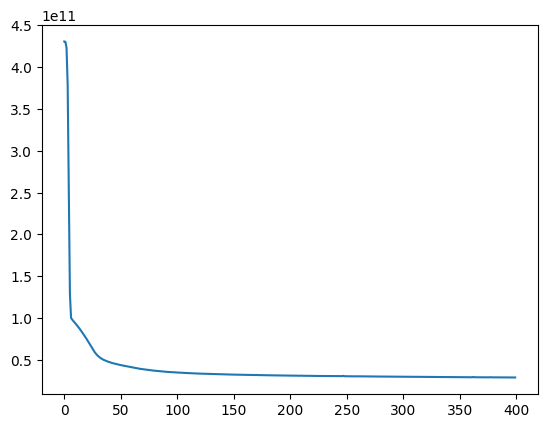

In [167]:
#Plot loss
plt.plot(loss_df['LOSS'])

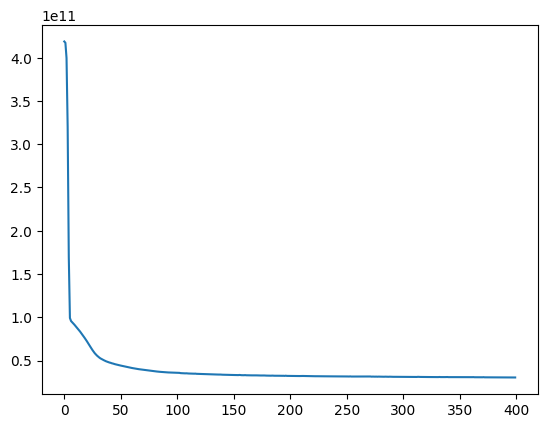

In [169]:
#Plot val_loss
plt.plot(loss_df['VALIDATION LOSS'])

In [171]:
#Take predictions from model
predictions = model.predict(x_test)

223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [173]:
#Import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [175]:
#Calculate metrics
print('MAE ->',mean_absolute_error(y_test,predictions))
print('MSE ->',mean_squared_error(y_test,predictions))
print('Explained Variance Score ->',explained_variance_score(y_test,predictions))

MAE -> 106751.273404063
MSE -> 30384058535.06641
Explained Variance Score -> 0.767600052784613


In [181]:
#RMSE
np.sqrt(mean_squared_error(y_test,predictions))

174310.23646093308

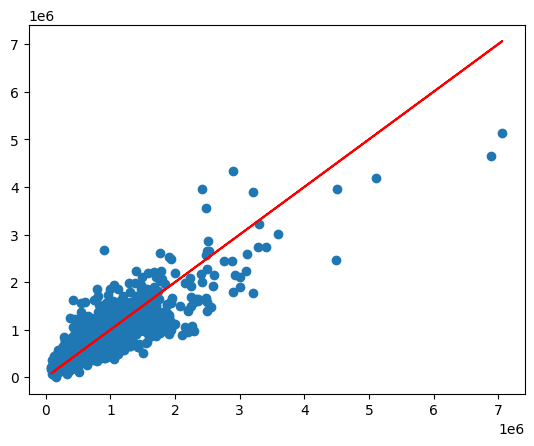

In [185]:
#Scatter of pred vs actual values
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,color='red')

#END OF NOTEBOOK

#CREATED BY SHAURYA MITTAL